<a href="https://colab.research.google.com/github/poornimababu2021-maker/data-analysis/blob/main/Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
train.dtypes

,0
ID,int64
City_Code,object
Region_Code,int64
Accomodation_Type,object
Reco_Insurance_Type,object
Upper_Age,int64
Lower_Age,int64
Is_Spouse,object
Health Indicator,object
Holding_Policy_Duration,object


In [ ]:
train.shape


(50882, 14)

In [ ]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [ ]:
test.dtypes

,0
ID,int64
City_Code,object
Region_Code,int64
Accomodation_Type,object
Reco_Insurance_Type,object
Upper_Age,int64
Lower_Age,int64
Is_Spouse,object
Health Indicator,object
Holding_Policy_Duration,object


In [ ]:
test.shape

(21805, 13)

In [ ]:
for col in test.select_dtypes(include=['object']).columns:
    unique_vals = test[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'City_Code' (36 unique values):
['C1' 'C4' 'C3' 'C2' 'C13' 'C18' 'C16' 'C17' 'C11' 'C7' 'C21' 'C34' 'C14'
 'C8' 'C12' 'C6' 'C10' 'C9' 'C23' 'C32' 'C26' 'C15' 'C24' 'C20' 'C19' 'C5'
 'C28' 'C30' 'C25' 'C29' 'C27' 'C33' 'C22' 'C36' 'C35' 'C31']
--------------------------------------------------
Column 'Accomodation_Type' (2 unique values):
['Owned' 'Rented']
--------------------------------------------------
Column 'Reco_Insurance_Type' (2 unique values):
['Individual' 'Joint']
--------------------------------------------------
Column 'Is_Spouse' (2 unique values):
['No' 'Yes']
--------------------------------------------------
Column 'Health Indicator' (9 unique values):
['X1' 'X3' 'X2' 'X5' 'X4' 'X7' 'X6' 'X9' 'X8']
--------------------------------------------------
Column 'Holding_Policy_Duration' (15 unique values):
['6.0' '3.0' '2.0' '14+' '5.0' '1.0' '4.0' '12.0' '11.0' '7.0' '9.0'
 '13.0' '8.0' '14.0' '10.0']
--------------------------------------------------


In [ ]:
for col in train.select_dtypes(include=['object']).columns:
    unique_vals = train[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'City_Code' (36 unique values):
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
--------------------------------------------------
Column 'Accomodation_Type' (2 unique values):
['Rented' 'Owned']
--------------------------------------------------
Column 'Reco_Insurance_Type' (2 unique values):
['Individual' 'Joint']
--------------------------------------------------
Column 'Is_Spouse' (2 unique values):
['No' 'Yes']
--------------------------------------------------
Column 'Health Indicator' (9 unique values):
['X1' 'X2' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
--------------------------------------------------
Column 'Holding_Policy_Duration' (15 unique values):
['14+' '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
--------------------------------------------------


In [ ]:
print("Missing values in train dataset:")
print(train.isnull().sum())
print("\nMissing values in test dataset:")
print(test.isnull().sum())

Missing values in train dataset:
ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Missing values in test dataset:
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


In [ ]:
print("Missing values in train dataset (including '?'):")
for col in train.columns:
    q_count = (train[col] == '?').sum()
    nan_count = train[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing > 0:
        print(f"Column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

print("\nMissing values in test dataset (including '?'):")
for col in test.columns:
    q_count = (test[col] == '?').sum()
    nan_count = test[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing > 0:
        print(f"Column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

Missing values in train dataset (including '?'):
Column 'Health Indicator': '?' = 0, NaN = 11691, Total missing = 11691
Column 'Holding_Policy_Duration': '?' = 0, NaN = 20251, Total missing = 20251
Column 'Holding_Policy_Type': '?' = 0, NaN = 20251, Total missing = 20251

Missing values in test dataset (including '?'):
Column 'Health Indicator': '?' = 0, NaN = 5027, Total missing = 5027
Column 'Holding_Policy_Duration': '?' = 0, NaN = 8603, Total missing = 8603
Column 'Holding_Policy_Type': '?' = 0, NaN = 8603, Total missing = 8603


In [ ]:
import numpy as np

print("Missing value proportions in train dataset (including '?'):")
train_missing = train.replace("?", np.nan)
missing_proportions_train = train_missing.isna().mean()

for col, prop in missing_proportions_train.items():
    if prop > 0:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

print("\nMissing value proportions in test dataset (including '?'):")
test_missing = test.replace("?", np.nan)
missing_proportions_test = test_missing.isna().mean()

for col, prop in missing_proportions_test.items():
    if prop > 0:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

Missing value proportions in train dataset (including '?'):
Column 'Health Indicator': 22.98% missing (including '?')
Column 'Holding_Policy_Duration': 39.80% missing (including '?')
Column 'Holding_Policy_Type': 39.80% missing (including '?')

Missing value proportions in test dataset (including '?'):
Column 'Health Indicator': 23.05% missing (including '?')
Column 'Holding_Policy_Duration': 39.45% missing (including '?')
Column 'Holding_Policy_Type': 39.45% missing (including '?')


In [ ]:
print("Exploring 'Holding_Policy_Duration' in train dataset:")
display(train['Holding_Policy_Duration'].value_counts(dropna=False))

print("\nExploring 'Holding_Policy_Duration' in test dataset:")
display(test['Holding_Policy_Duration'].value_counts(dropna=False))

print("\nExploring 'Holding_Policy_Type' in train dataset:")
display(train['Holding_Policy_Type'].value_counts(dropna=False))

print("\nExploring 'Holding_Policy_Type' in test dataset:")
display(test['Holding_Policy_Type'].value_counts(dropna=False))

Exploring 'Holding_Policy_Duration' in train dataset:


,count
Holding_Policy_Duration,
NaN,20251
1.0,4499
14+,4335
2.0,4260
3.0,3586
4.0,2771
5.0,2362
6.0,1894
7.0,1645



Exploring 'Holding_Policy_Duration' in test dataset:


,count
Holding_Policy_Duration,
NaN,8603
14+,1892
1.0,1891
2.0,1772
3.0,1606
4.0,1205
5.0,992
6.0,903
7.0,664



Exploring 'Holding_Policy_Type' in train dataset:


,count
Holding_Policy_Type,
NaN,20251
3.0,13279
1.0,8173
2.0,5005
4.0,4174



Exploring 'Holding_Policy_Type' in test dataset:


,count
Holding_Policy_Type,
NaN,8603
3.0,5572
1.0,3574
2.0,2150
4.0,1906


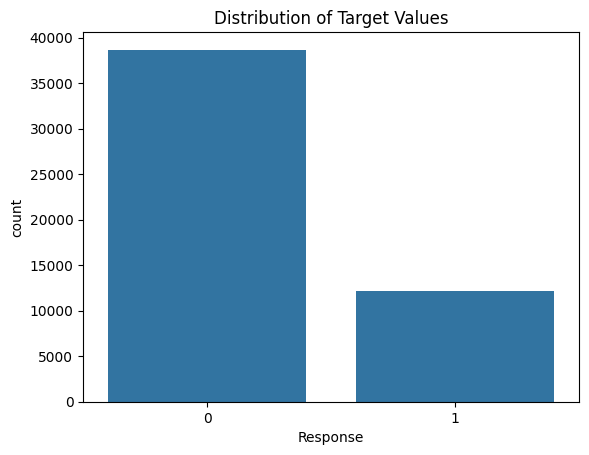

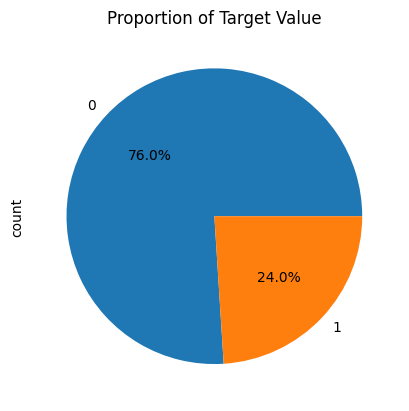

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Response", data=train)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
train['Response'].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

/tmp/ipython-input-3897376545.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Reco_Policy_Premium'] , color='skyblue',shade=True,label='Response 0')
/tmp/ipython-input-3897376545.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Reco_Policy_Premium'] , color='lightcoral',shade=True, label='Response 1')


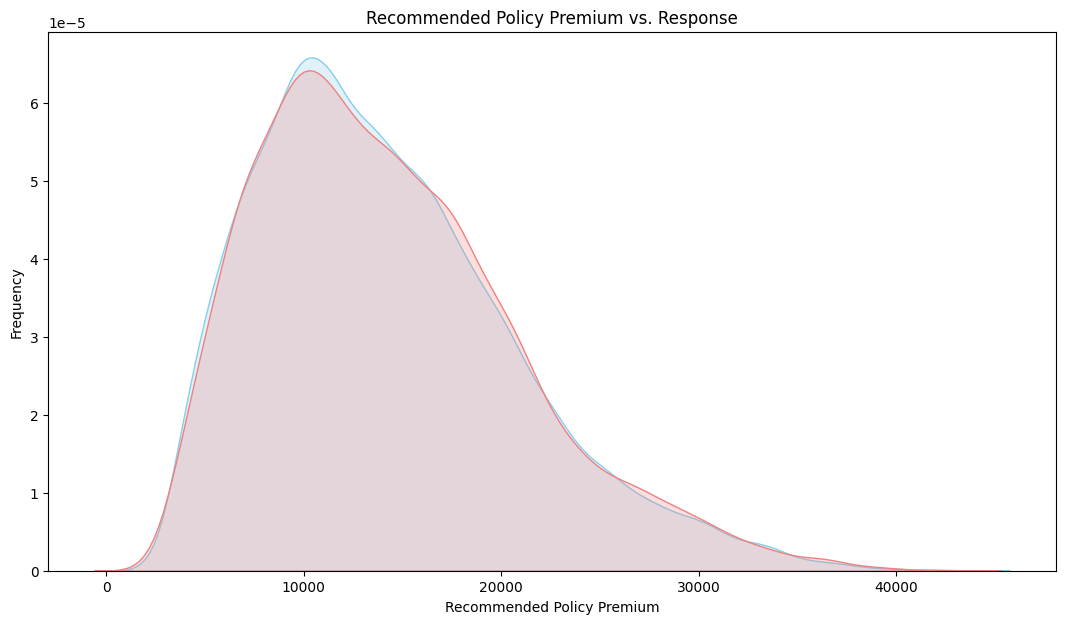

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Reco_Policy_Premium'] , color='skyblue',shade=True,label='Response 0')
ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Reco_Policy_Premium'] , color='lightcoral',shade=True, label='Response 1')
ax.set(xlabel='Recommended Policy Premium', ylabel='Frequency')
plt.title('Recommended Policy Premium vs. Response')
plt.show()

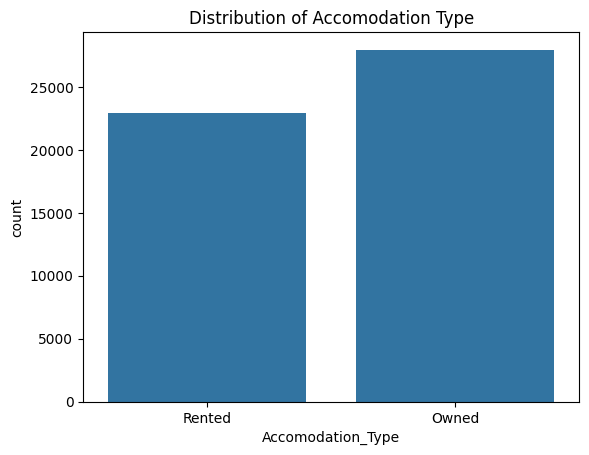

Proportions of Accomodation Type
Accomodation_Type
Owned     0.54933
Rented    0.45067
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Accomodation_Type", data=train)
plt.title("Distribution of Accomodation Type")
plt.show()

print("Proportions of Accomodation Type")
print(train['Accomodation_Type'].value_counts(normalize=True))

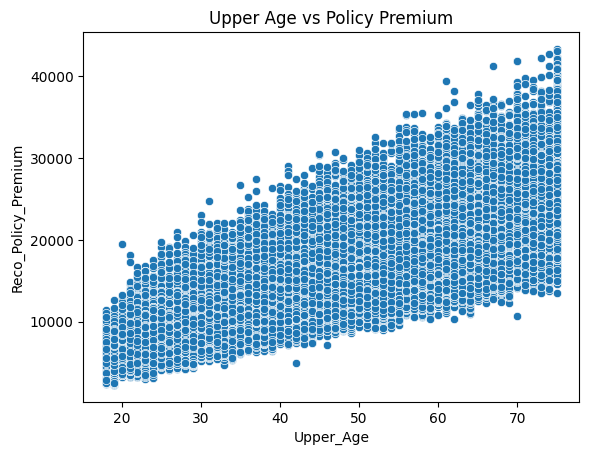

In [ ]:
sns.scatterplot(x='Upper_Age', y='Reco_Policy_Premium',data=train)
plt.title('Upper Age vs Policy Premium')
plt.show()

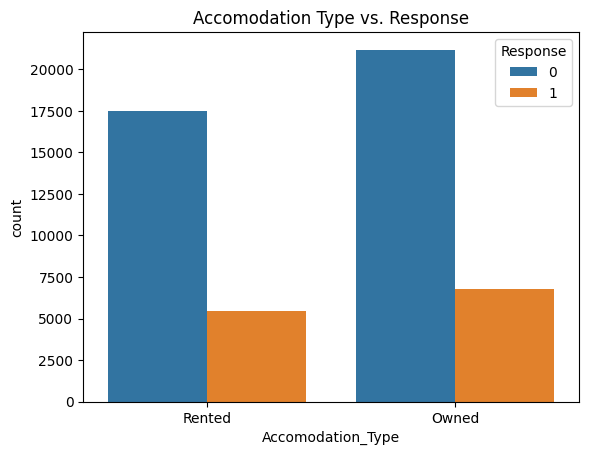

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Accomodation_Type", hue="Response", data=train)
plt.title("Accomodation Type vs. Response")
plt.show()

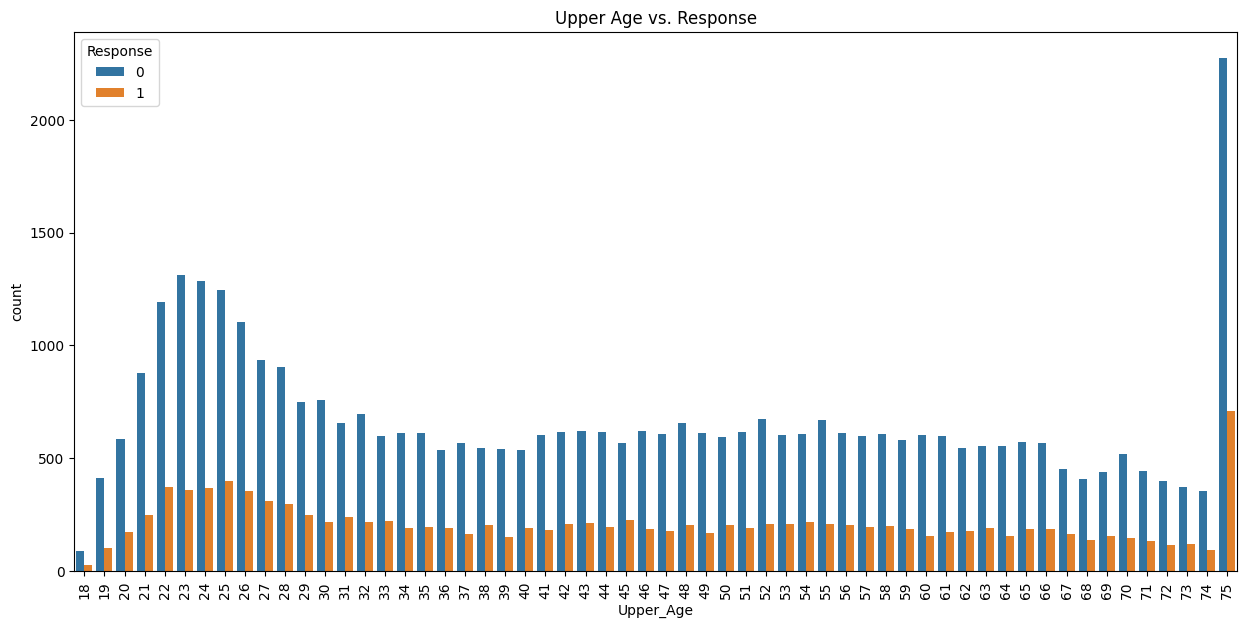

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7)) # Adjust figure size for better readability if many age values
sns.countplot(x="Upper_Age", hue="Response", data=train)
plt.title("Upper Age vs. Response")
plt.xticks(rotation=90) # Rotate x-axis labels if they overlap
plt.show()

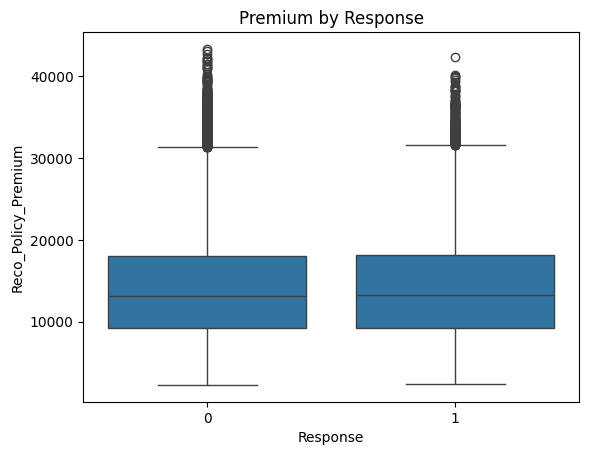

In [ ]:
sns.boxplot(x='Response' , y='Reco_Policy_Premium' , data=train)
plt.title('Premium by Response')
plt.show()

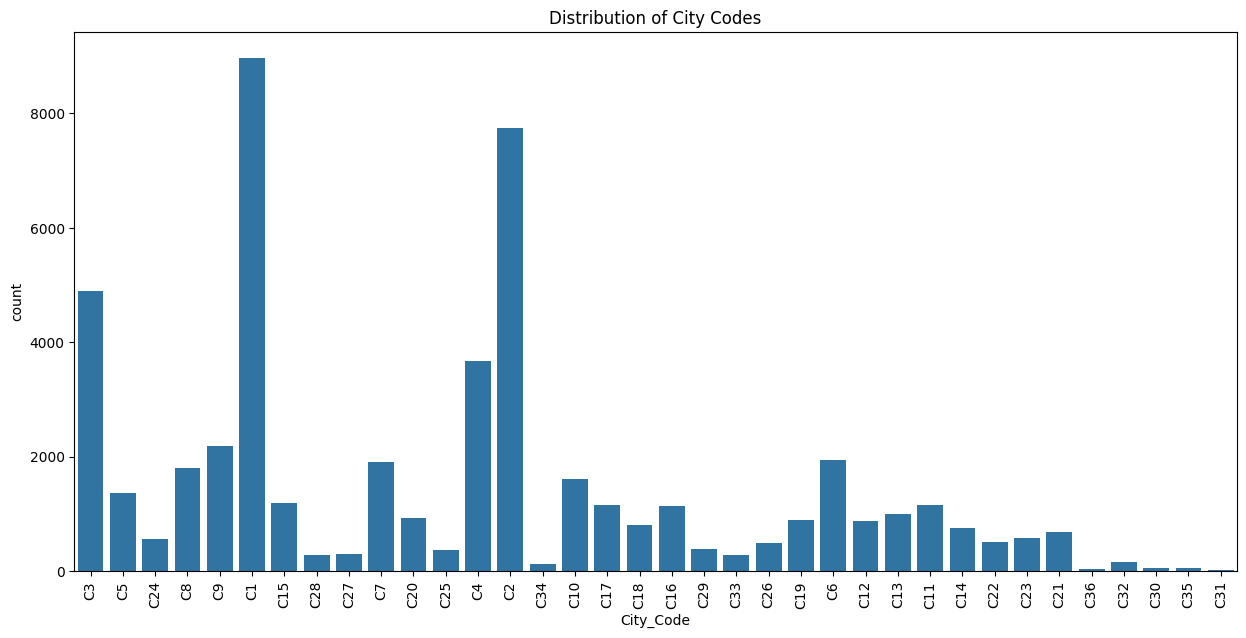

Distribution of City Codes:
City_Code
C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7)) # Adjust figure size for better readability
sns.countplot(x="City_Code", data=train)
plt.title("Distribution of City Codes")
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.show()

print("Distribution of City Codes:")
print(train['City_Code'].value_counts())

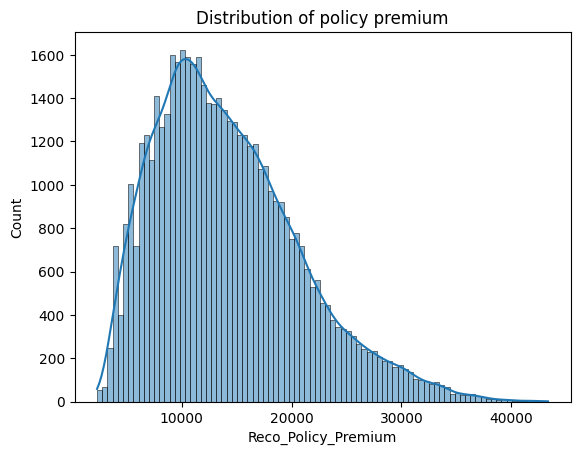

In [ ]:
sns.histplot(train['Reco_Policy_Premium'],kde=True)
plt.title('Distribution of policy premium')
plt.show()

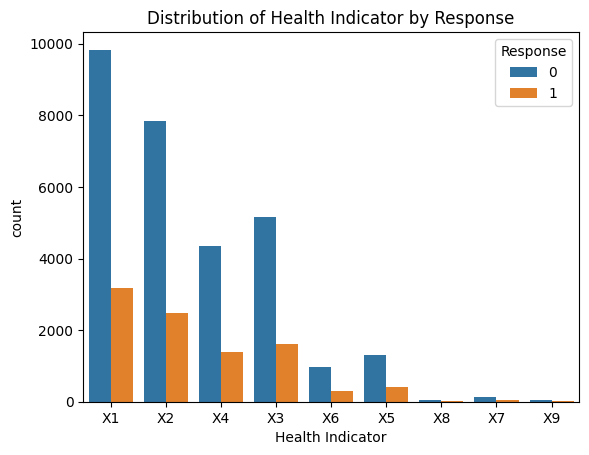

Distribution of Health Indicator:
Health Indicator
X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Health Indicator", hue="Response", data=train)
plt.title("Distribution of Health Indicator by Response")
plt.show()

print("Distribution of Health Indicator:")
print(train['Health Indicator'].value_counts())

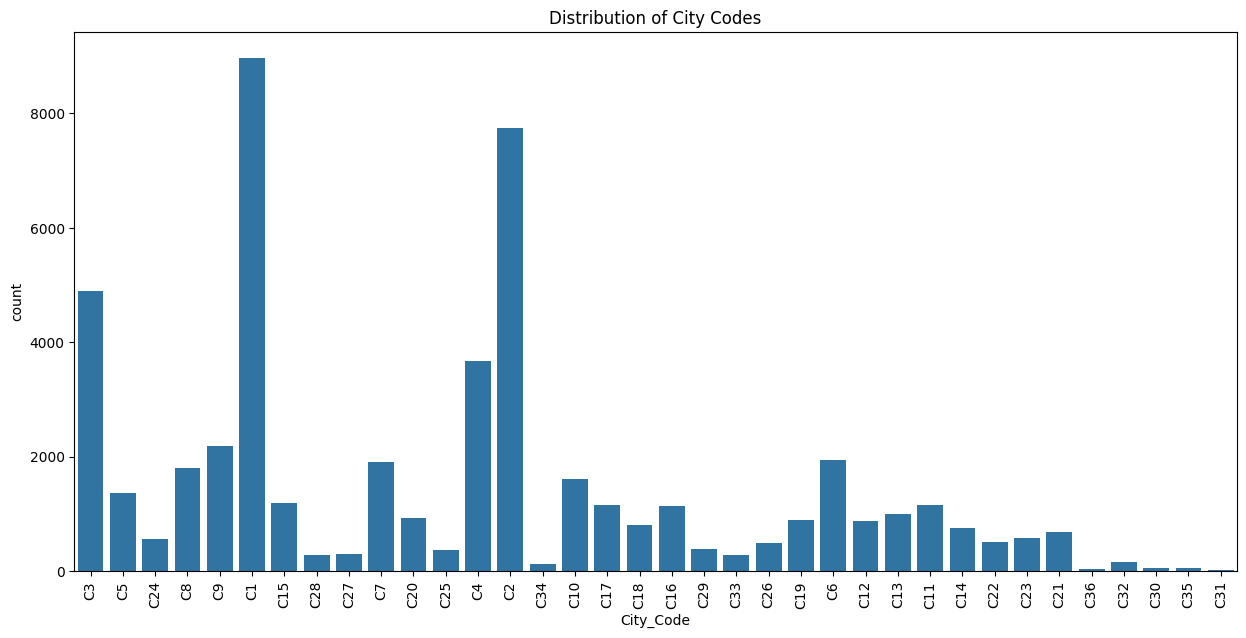

Distribution of City Codes:
City_Code
C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7)) # Adjust figure size for better readability
sns.countplot(x="City_Code", data=train)
plt.title("Distribution of City Codes")
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.show()

print("Distribution of City Codes:")
print(train['City_Code'].value_counts())

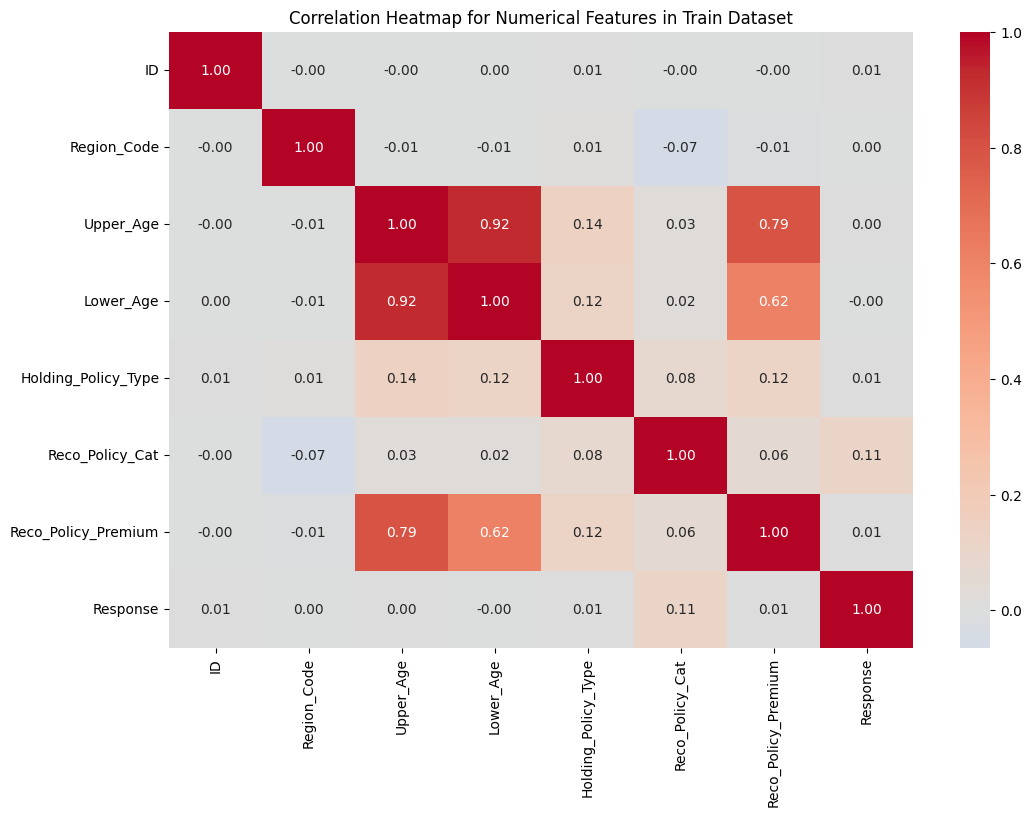

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the train dataset
numeric_cols = train.select_dtypes(include=['number']).columns.tolist()

# Compute correlation matrix for numeric columns only
corr_matrix = train[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Numerical Features in Train Dataset')
plt.show()

In [ ]:
import pickle
with open('train_data.pkl', 'wb') as f:
    pickle.dump(train, f)
print("DataFrame saved with pickle.")

DataFrame saved with pickle.




**OBSERVATIONS**

The initial cells import necessary libraries like pandas, numpy, matplotlib, and seaborn, and then load the train.csv, test.csv, and sample_submission.csv files into pandas DataFrames.

Subsequently, the data types and shapes of the train and test DataFrames are examined. The unique values in the object type columns for both dataframes are then printed to understand the categorical data.

Missing values are identified using isnull().sum() and by checking for '?' characters, and their proportions in both train and test datasets are calculated and displayed. The distribution of values in the 'Holding_Policy_Duration' and 'Holding_Policy_Type' columns, including NaN values, is also explored.

Visualizations are generated to understand the data distribution and relationships. A countplot and pie chart show the distribution of the target variable 'Response'. Kernel density plots visualize the distribution of 'Reco_Policy_Premium' for different response values. Countplots are used to display the distribution of 'Accomodation_Type', its relationship with 'Response', and the distribution of 'Upper_Age' in relation to 'Response'. A boxplot shows the relationship between 'Response' and 'Reco_Policy_Premium'. The distribution of 'City_Code' and 'Health Indicator' are also plotted and their value counts are printed.

Finally, a correlation heatmap for the numerical features in the training dataset is generated, and the train DataFrame is saved to a pickle file named train_data.pkl.


